# Preprocess the latent finger print 
There will be 3 sets of same latent 
1. the original 
2. the blur patched 
3. the more blur patched 

# Get pics from SOCOFinger

In [7]:
import glob
import random
import numpy as np
import matplotlib.pyplot as plt


In [8]:
dir = glob.glob("E:/Datasets/SOCOFing/glob/*/")
dir.sort()
len(dir)
print(dir)

['E:/Datasets/SOCOFing/glob\\SOCOFing_1201to1500\\', 'E:/Datasets/SOCOFing/glob\\SOCOFing_1501to1800\\', 'E:/Datasets/SOCOFing/glob\\SOCOFing_1801to2100\\', 'E:/Datasets/SOCOFing/glob\\SOCOFing_2101to2400\\', 'E:/Datasets/SOCOFing/glob\\SOCOFing_2401to2700\\', 'E:/Datasets/SOCOFing/glob\\SOCOFing_2701to3000\\', 'E:/Datasets/SOCOFing/glob\\SOCOFing_3001to3300\\', 'E:/Datasets/SOCOFing/glob\\SOCOFing_300\\', 'E:/Datasets/SOCOFing/glob\\SOCOFing_301to600\\', 'E:/Datasets/SOCOFing/glob\\SOCOFing_3301to3600\\', 'E:/Datasets/SOCOFing/glob\\SOCOFing_3601to3900\\', 'E:/Datasets/SOCOFing/glob\\SOCOFing_3901to4200\\', 'E:/Datasets/SOCOFing/glob\\SOCOFing_4201to4500\\', 'E:/Datasets/SOCOFing/glob\\SOCOFing_4501to4800\\', 'E:/Datasets/SOCOFing/glob\\SOCOFing_4801to5100\\', 'E:/Datasets/SOCOFing/glob\\SOCOFing_5101to5400\\', 'E:/Datasets/SOCOFing/glob\\SOCOFing_5401to5700\\', 'E:/Datasets/SOCOFing/glob\\SOCOFing_5701to6000\\', 'E:/Datasets/SOCOFing/glob\\SOCOFing_601to900\\', 'E:/Datasets/SOCOFing/

In [9]:
image_list = []
for i in range (len(dir)):
    temp = [f for f in glob.glob(dir[i] + "*.BMP")]
    image_list.append(temp)

In [10]:
flat_list = [item for sublist in image_list for item in sublist]


In [11]:
NO_OF_PICTURE = len(flat_list)
# NO_OF_PICTURE = 600
print(NO_OF_PICTURE)

6000


In [12]:
dir = glob.glob("E:/Datasets/SOCOFing/Processed/*/")
dir.sort()
len(dir)
print(dir)

['E:/Datasets/SOCOFing/Processed\\latent_image_flipped\\', 'E:/Datasets/SOCOFing/Processed\\latent_image_rotated\\', 'E:/Datasets/SOCOFing/Processed\\latent_image_rotated_flipped\\']


In [13]:
image_list2 = []
for i in range (len(dir)):
    temp = [f for f in glob.glob(dir[i] + "*.BMP")]
    image_list2.append(temp)

In [14]:
flat_list2 = [item for sublist in image_list2 for item in sublist]

In [15]:
NO_OF_PICTURE2 = len(flat_list2)
# NO_OF_PICTURE = 600
print(NO_OF_PICTURE2)

3600


In [16]:
test_split_list = random.sample(flat_list, 500)

In [17]:
len(test_split_list)
print(test_split_list)

['E:/Datasets/SOCOFing/glob\\SOCOFing_2401to2700\\251__M_Right_ring_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_1201to1500\\136__F_Left_ring_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_300\\15__F_Right_index_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_3601to3900\\369__F_Right_middle_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_4501to4800\\472__M_Right_little_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_301to600\\57__M_Right_ring_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_3601to3900\\375__M_Left_ring_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_4501to4800\\468__F_Left_little_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_2101to2400\\235__M_Left_ring_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_5701to6000\\581__F_Left_little_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_301to600\\60__M_Right_ring_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_1201to1500\\135__F_Left_little_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_5101to5400\

In [18]:
train_list = list(set(flat_list) - set(test_split_list))
print(len(train_list))

5500


In [19]:
train_list_final = train_list + flat_list2
NO_OF_PICTURE = len(train_list_final) # = 5500+3600
print(len(train_list_final))

9100


# Resize crop and make it blur to 64

In [20]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def random_circle_blur(image, radius, blur_level_low, blur_level_high, ksize=(5,5)):
    blurred_img_low = cv2.GaussianBlur(image, ksize, blur_level_low)
    blurred_img_high = cv2.GaussianBlur(image, ksize, blur_level_high)

    mask = np.zeros((image.shape[0], image.shape[1], image.shape[2]), dtype=np.uint8)

    border_size = 10
    position_x = random.randint(border_size + (radius // 2), image.shape[1] - border_size - (radius // 2))
    position_y = random.randint(border_size + (radius // 2), image.shape[0] - border_size - (radius // 2))
    
    mask = cv2.circle(mask, (position_y, position_x), radius, (255, 255, 255), -1)
    result_image_low = np.where(mask==(255, 255, 255), blurred_img_low, image)
    result_image_high = np.where(mask==(255, 255, 255), blurred_img_high, image)

    return result_image_low, result_image_high

In [24]:
def crop_image(image):
    height = image.shape[0]
    width = image.shape[1]
    padding_top = 9
    padding_left = 2
    padding_right = 4 
    padding_bottom = 4 
    return image[padding_top:height - padding_bottom, padding_left:width - padding_right]

In [25]:
LOW_BLUR_LEVEL = 1
HIGH_BLUR_LEVEL = 6
RANDOM_RADIUS_MIN = 12
RANDOM_RADIUS_MAX = 18

# SAVING_PATH = '/home/c_thititanapak/latent_image_processed64/'
SAVING_PATH = 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96/'


for i, path in enumerate(train_list_final):
    if i >= NO_OF_PICTURE :
        break
    random_radius = random.randint(RANDOM_RADIUS_MIN, RANDOM_RADIUS_MAX)
    
    image = cv2.imread(path, 1)
    image = crop_image(image)
    image = cv2.resize(image, (96,96))

    _, res_image_high = random_circle_blur(image, random_radius, LOW_BLUR_LEVEL, HIGH_BLUR_LEVEL)

    cv2.imwrite(SAVING_PATH + 'original_' + str(i) + '.BMP', image)
#     cv2.imwrite(SAVING_PATH + 'low_blur_' + str(i) + '.BMP', res_image_low)
    cv2.imwrite(SAVING_PATH + 'high_blur_' + str(i) + '.BMP', res_image_high)


In [26]:
temp0 = cv2.imread(SAVING_PATH + 'original_10.BMP', 0)
temp1 = cv2.imread(SAVING_PATH + 'high_blur_10.BMP', 0)
# temp2 = cv2.imread(SAVING_PATH + 'low_blur_0.BMP', 0)

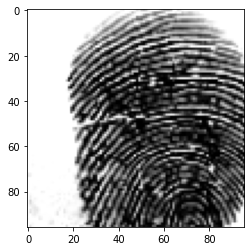

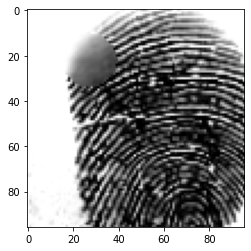

In [27]:
plt.imshow(temp0, cmap='gray')
plt.show()
plt.imshow(temp1, cmap='gray')
plt.show()


In [28]:
print(test_split_list)

['E:/Datasets/SOCOFing/glob\\SOCOFing_2401to2700\\251__M_Right_ring_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_1201to1500\\136__F_Left_ring_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_300\\15__F_Right_index_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_3601to3900\\369__F_Right_middle_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_4501to4800\\472__M_Right_little_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_301to600\\57__M_Right_ring_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_3601to3900\\375__M_Left_ring_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_4501to4800\\468__F_Left_little_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_2101to2400\\235__M_Left_ring_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_5701to6000\\581__F_Left_little_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_301to600\\60__M_Right_ring_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_1201to1500\\135__F_Left_little_finger.BMP', 'E:/Datasets/SOCOFing/glob\\SOCOFing_5101to5400\

In [29]:
SAVING_PATH2 = 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/'


for i, path in enumerate(test_split_list):

    print(i)
    print(path)
    random_radius = random.randint(RANDOM_RADIUS_MIN, RANDOM_RADIUS_MAX)
    
    image = cv2.imread(path, 1)
    image = crop_image(image)
    image = cv2.resize(image, (96,96))

    _, res_image_high = random_circle_blur(image, random_radius, LOW_BLUR_LEVEL, HIGH_BLUR_LEVEL)


    print(SAVING_PATH2 + 'original_' + str(i) + '.BMP')
    print(cv2.imwrite(SAVING_PATH2 + 'original_' + str(i) + '.BMP', image))
#     cv2.imwrite(SAVING_PATH + 'low_blur_' + str(i) + '.BMP', res_image_low)
    print(cv2.imwrite(SAVING_PATH2 + 'high_blur_' + str(i) + '.BMP', res_image_high))


0
E:/Datasets/SOCOFing/glob\SOCOFing_2401to2700\251__M_Right_ring_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_0.BMP
True
True
1
E:/Datasets/SOCOFing/glob\SOCOFing_1201to1500\136__F_Left_ring_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_1.BMP
True
True
2
E:/Datasets/SOCOFing/glob\SOCOFing_300\15__F_Right_index_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_2.BMP
True
True
3
E:/Datasets/SOCOFing/glob\SOCOFing_3601to3900\369__F_Right_middle_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_3.BMP
True
True
4
E:/Datasets/SOCOFing/glob\SOCOFing_4501to4800\472__M_Right_little_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_4.BMP
True
True
5
E:/Datasets/SOCOFing/glob\SOCOFing_301to600\57__M_Right_ring_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_5.BMP
True
True
6
E:/Datasets/SOCOFing/

E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_58.BMP
True
True
59
E:/Datasets/SOCOFing/glob\SOCOFing_3001to3300\316__M_Left_little_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_59.BMP
True
True
60
E:/Datasets/SOCOFing/glob\SOCOFing_301to600\55__M_Left_ring_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_60.BMP
True
True
61
E:/Datasets/SOCOFing/glob\SOCOFing_300\20__M_Right_ring_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_61.BMP
True
True
62
E:/Datasets/SOCOFing/glob\SOCOFing_3601to3900\377__M_Right_thumb_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_62.BMP
True
True
63
E:/Datasets/SOCOFing/glob\SOCOFing_5401to5700\558__M_Left_index_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_63.BMP
True
True
64
E:/Datasets/SOCOFing/glob\SOCOFing_3001to3300\324__M_Right_index_finger.BMP
E:/Datasets/S

E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_120.BMP
True
True
121
E:/Datasets/SOCOFing/glob\SOCOFing_2401to2700\249__M_Left_middle_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_121.BMP
True
True
122
E:/Datasets/SOCOFing/glob\SOCOFing_1801to2100\181__M_Right_little_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_122.BMP
True
True
123
E:/Datasets/SOCOFing/glob\SOCOFing_3301to3600\351__M_Left_middle_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_123.BMP
True
True
124
E:/Datasets/SOCOFing/glob\SOCOFing_1201to1500\137__M_Right_little_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_124.BMP
True
True
125
E:/Datasets/SOCOFing/glob\SOCOFing_4201to4500\427__M_Right_ring_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_125.BMP
True
True
126
E:/Datasets/SOCOFing/glob\SOCOFing_2401to2700\254__M_Left_thu

True
183
E:/Datasets/SOCOFing/glob\SOCOFing_601to900\65__M_Right_thumb_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_183.BMP
True
True
184
E:/Datasets/SOCOFing/glob\SOCOFing_5701to6000\599__M_Right_little_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_184.BMP
True
True
185
E:/Datasets/SOCOFing/glob\SOCOFing_5101to5400\527__M_Right_index_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_185.BMP
True
True
186
E:/Datasets/SOCOFing/glob\SOCOFing_3601to3900\385__M_Left_thumb_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_186.BMP
True
True
187
E:/Datasets/SOCOFing/glob\SOCOFing_3001to3300\310__M_Right_middle_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_187.BMP
True
True
188
E:/Datasets/SOCOFing/glob\SOCOFing_5401to5700\562__F_Right_ring_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_18

True
True
234
E:/Datasets/SOCOFing/glob\SOCOFing_901to1200\110__F_Left_middle_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_234.BMP
True
True
235
E:/Datasets/SOCOFing/glob\SOCOFing_3001to3300\305__M_Left_middle_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_235.BMP
True
True
236
E:/Datasets/SOCOFing/glob\SOCOFing_301to600\55__M_Right_ring_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_236.BMP
True
True
237
E:/Datasets/SOCOFing/glob\SOCOFing_2101to2400\222__M_Left_thumb_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_237.BMP
True
True
238
E:/Datasets/SOCOFing/glob\SOCOFing_3301to3600\340__M_Right_index_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_238.BMP
True
True
239
E:/Datasets/SOCOFing/glob\SOCOFing_5401to5700\556__F_Left_thumb_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_2

E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_294.BMP
True
True
295
E:/Datasets/SOCOFing/glob\SOCOFing_2401to2700\249__M_Right_little_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_295.BMP
True
True
296
E:/Datasets/SOCOFing/glob\SOCOFing_3601to3900\368__M_Left_little_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_296.BMP
True
True
297
E:/Datasets/SOCOFing/glob\SOCOFing_4501to4800\475__M_Right_ring_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_297.BMP
True
True
298
E:/Datasets/SOCOFing/glob\SOCOFing_4201to4500\440__M_Left_index_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_298.BMP
True
True
299
E:/Datasets/SOCOFing/glob\SOCOFing_3601to3900\375__M_Left_middle_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_299.BMP
True
True
300
E:/Datasets/SOCOFing/glob\SOCOFing_3301to3600\354__M_Right_inde

E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_355.BMP
True
True
356
E:/Datasets/SOCOFing/glob\SOCOFing_1201to1500\127__F_Right_little_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_356.BMP
True
True
357
E:/Datasets/SOCOFing/glob\SOCOFing_1501to1800\159__M_Right_thumb_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_357.BMP
True
True
358
E:/Datasets/SOCOFing/glob\SOCOFing_4201to4500\448__M_Right_middle_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_358.BMP
True
True
359
E:/Datasets/SOCOFing/glob\SOCOFing_4501to4800\476__M_Right_index_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_359.BMP
True
True
360
E:/Datasets/SOCOFing/glob\SOCOFing_4501to4800\451__M_Right_index_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_360.BMP
True
True
361
E:/Datasets/SOCOFing/glob\SOCOFing_4801to5100\508__F_Right_m

E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_414.BMP
True
True
415
E:/Datasets/SOCOFing/glob\SOCOFing_601to900\72__M_Right_thumb_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_415.BMP
True
True
416
E:/Datasets/SOCOFing/glob\SOCOFing_2401to2700\263__F_Right_little_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_416.BMP
True
True
417
E:/Datasets/SOCOFing/glob\SOCOFing_3901to4200\412__M_Left_index_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_417.BMP
True
True
418
E:/Datasets/SOCOFing/glob\SOCOFing_5101to5400\535__M_Right_middle_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_418.BMP
True
True
419
E:/Datasets/SOCOFing/glob\SOCOFing_4801to5100\489__M_Left_thumb_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_419.BMP
True
True
420
E:/Datasets/SOCOFing/glob\SOCOFing_3901to4200\407__M_Right_ring_f

E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_477.BMP
True
True
478
E:/Datasets/SOCOFing/glob\SOCOFing_2701to3000\288__M_Left_middle_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_478.BMP
True
True
479
E:/Datasets/SOCOFing/glob\SOCOFing_1501to1800\177__F_Left_ring_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_479.BMP
True
True
480
E:/Datasets/SOCOFing/glob\SOCOFing_5701to6000\577__M_Left_middle_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_480.BMP
True
True
481
E:/Datasets/SOCOFing/glob\SOCOFing_3901to4200\407__M_Right_little_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_481.BMP
True
True
482
E:/Datasets/SOCOFing/glob\SOCOFing_3301to3600\358__M_Left_middle_finger.BMP
E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/original_482.BMP
True
True
483
E:/Datasets/SOCOFing/glob\SOCOFing_1501to1800\171__M_Right_inde

In [30]:
temp0 = cv2.imread(SAVING_PATH2 + 'original_10.BMP', 0)
temp1 = cv2.imread(SAVING_PATH2 + 'high_blur_10.BMP', 0)

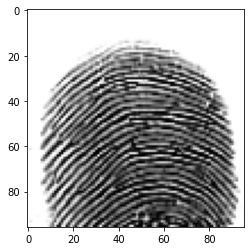

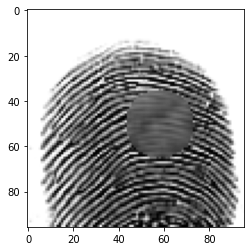

In [31]:
plt.imshow(temp0, cmap='gray')
plt.show()
plt.imshow(temp1, cmap='gray')
plt.show()

In [35]:
PATH = 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96/'

high_blur_list_train = [f for f in glob.glob(PATH + 'high_blur_*.BMP')]
high_blur_list_train.sort()
print(high_blur_list_train)

original_list_train = [f for f in glob.glob(PATH + 'original_*.BMP')]
original_list_train.sort()
print(original_list_train)

['E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96\\high_blur_0.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96\\high_blur_1.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96\\high_blur_10.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96\\high_blur_100.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96\\high_blur_1000.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96\\high_blur_1001.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96\\high_blur_1002.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96\\high_blur_1003.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96\\high_blur_1004.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96\\high_blur_1005.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96\\high_blur_1006.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96\\high_blur_1007.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_process

In [36]:
PATH = 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test/'

high_blur_list_test = [f for f in glob.glob(PATH + 'high_blur_*.BMP')]
high_blur_list_test.sort()
print(high_blur_list_test)

original_list_test = [f for f in glob.glob(PATH + 'original_*.BMP')]
original_list_test.sort()
print(original_list_test)

['E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test\\high_blur_0.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test\\high_blur_1.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test\\high_blur_10.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test\\high_blur_100.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test\\high_blur_101.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test\\high_blur_102.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test\\high_blur_103.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test\\high_blur_104.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test\\high_blur_105.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test\\high_blur_106.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test\\high_blur_107.BMP', 'E:/Datasets/SOCOFing/Ready/latent_image_processed_gae_96_test\\high_blur_108.BM

In [37]:
print(len(high_blur_list_train), len(original_list_train))
print(len(high_blur_list_test), len(original_list_test))

9100 9100
500 500


In [ ]:
def concat_image_to_list(high_blur_list, original_list):
    concatinated_list_train = []

    if (len(high_blur_list) == len(original_list)):
        high_blur_list.sort()
        original_list.sort()
        for i in range(len(high_blur_list)):
            high_blur_image = cv2.imread(high_blur_list[i], cv2.IMREAD_COLOR)
            original_image = cv2.imread(original_list[i], cv2.IMREAD_COLOR)
            temp = [high_blur_image, original_image]
            concatinated_list_train.append(temp)
        
    return concatinated_list_train

In [ ]:
concatinated_list_train = concat_image_to_list(high_blur_list_train, original_list_train)
concatinated_list_test = concat_image_to_list(high_blur_list_test, original_list_test)